In [1]:
from pyquery import PyQuery as pq
from pprint import pprint
from functools import wraps
from matplotlib import pylab as plt
from sklearn.metrics import mean_squared_error


import numpy as np
%matplotlib inline
# %config InlineBackend.figure_format = "svg"

### Загрузим данные 
За период 1998 -- 2018

In [2]:
def load_data(data_file: "html", ret_flag: int=0)->tuple:
    text = [item.text() for item in data_file.items("pre")]
    text = text[0].split()
    text = text[3:] # del table 
    del(text[2::3]) # del sigma from data
    
    date = np.array(text[0::2]).astype(float).astype(int) # convert str to int
    
    data_value = np.array(text[1::2]).astype(float) # convert str value to float
    
    if ret_flag:
        return data_value, date
    return data_value

In [3]:
x_data = pq(filename='data_html/data_x_1997_2018.html')
y_data = pq(filename='data_html/data_y_1997_2018.html')
lod_data = pq(filename='data_html/data_lod_1997_2018.htm')
delta_data = pq(filename='data_html/ut1_utc.html')

In [4]:
x_coord, date = load_data(x_data, 1)
y_coord = load_data(y_data)
lod = load_data(lod_data)
delta = load_data(delta_data)

### Потсроим зависимости $x(t),~y(t),y(x)~,~l.o.d(t),~\Delta UT1(t) $



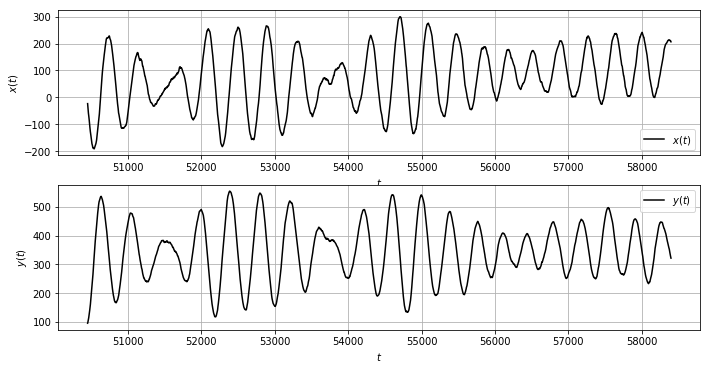

In [5]:
plt.figure(figsize=(11.5, 15.5))

plt.subplot(5,1,1)
plt.grid(True)
plt.ylabel("$x(t)$")
plt.xlabel("$t$")
plt.plot(date, x_coord, color="black", label="$x(t)$")
plt.legend()

plt.subplot(5,1,2)
plt.grid(True)
plt.ylabel("$y(t)$")
plt.xlabel("$t$")
plt.plot(date, y_coord, color="black", label="$y(t)$")
plt.legend()

plt.savefig("./figures/x_and_y_t.eps", format="eps", bbox_inches='tight')
plt.show()


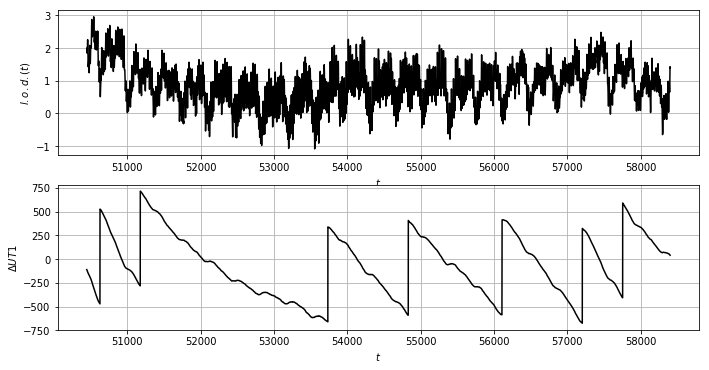

In [6]:
plt.figure(figsize=(11.5, 15.5))

plt.subplot(5,1,1)
plt.grid(True)
plt.ylabel("$l.o.d.(t)$")
plt.xlabel("$t$")
plt.plot(date, lod, color="black")

plt.subplot(5,1,2)
plt.grid(True)
plt.ylabel("$\Delta UT1$")
plt.xlabel("$t$")
plt.plot(date, delta, color="black")

plt.savefig("./figures/lod_and_delta_t.eps", format="eps", bbox_inches='tight')
plt.show()

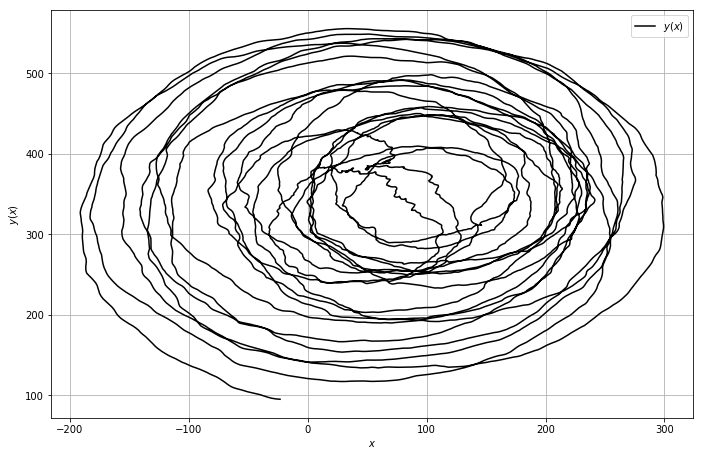

In [7]:
plt.figure(figsize=(11.5, 7.5))

plt.grid(True)
plt.ylabel("$y(x)$")
plt.xlabel("$x$")
plt.plot(x_coord, y_coord, color="black", label="$y(x)$")
plt.legend()

plt.savefig("./figures/y_x.eps", format="eps", bbox_inches='tight')
plt.show()